# I. Data Wrangling

## I-A. Connecting Data

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

olist = sqlite3.connect("olist.db")

## 1-B. Order Items Dataset

In [2]:
df_order_items = pd.read_sql_query("SELECT * FROM olist_order_items_dataset", olist)

In [3]:
df_order_items.head()

,index,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## I-C. Products Dataset

In [4]:
df_products = pd.read_sql_query("SELECT * FROM olist_products_dataset", olist)

## I-D. Translate Product Category Name

In [5]:
#import the translation
df_translations = pd.read_sql_query("SELECT * FROM product_category_name_translation", olist)
df_translations.drop('index', axis=1, inplace=True)

#make it dictionary
dict_products_en = dict([(i,[x]) for i, x in zip(df_translations.product_category_name, df_translations.product_category_name_english)])

#apply the translation
df_products["product_category_name"] = df_products["product_category_name"].replace(dict_products_en)

In [6]:
df_products.head()

,index,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,3,cef67bcfe19066a932b7673e239eb23d,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## 1-E. Orders Dataset

In [7]:
df_order = pd.read_sql_query("SELECT * FROM olist_order_dataset", olist)

In [8]:
df_order.head()

,index,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


## 1-F. Merging Order Items and Products Dataframe

In [9]:
ordered_products = pd.merge(df_order_items, df_products, on = "product_id", how = "left")

In [10]:
ordered_products.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27230,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,22624,furniture_decor,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15403,perfumery,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,8862,garden_tools,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


## 1-G. Merging Ordered Products and Orders Dataframe

In [11]:
ordered_products_date = pd.merge(ordered_products, df_order, on = "order_id", how = "left")

In [12]:
ordered_products_date.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,...,product_height_cm,product_width_cm,index,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,...,9.0,14.0,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27230,pet_shop,...,30.0,40.0,71853,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,22624,furniture_decor,...,13.0,33.0,6298,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15403,perfumery,...,10.0,15.0,22550,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,8862,garden_tools,...,40.0,30.0,5247,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


# II. Data Cleaning

## II-A. Overall data check

In [13]:
ordered_products_date.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   index_x                        112650 non-null  int64  
 1   order_id                       112650 non-null  object 
 2   order_item_id                  112650 non-null  int64  
 3   product_id                     112650 non-null  object 
 4   seller_id                      112650 non-null  object 
 5   shipping_limit_date            112650 non-null  object 
 6   price                          112650 non-null  float64
 7   freight_value                  112650 non-null  float64
 8   index_y                        112650 non-null  int64  
 9   product_category_name          111047 non-null  object 
 10  product_name_lenght            111047 non-null  float64
 11  product_description_lenght     111047 non-null  float64
 12  product_photos_qty            

We need order_purchase_time for this objective and order_purchase_time should type be date. Changing its type is required.

### Make a copy of the dataframe

Before we make an edit, it's suggested to make a copy

In [14]:
ordered_products_date_handled = ordered_products_date.copy()

### Changing order purchase time column type

In [15]:
ordered_products_date_handled["order_purchase_timestamp"] = pd.to_datetime(ordered_products_date_handled["order_purchase_timestamp"])

In [16]:
ordered_products_date_handled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   index_x                        112650 non-null  int64         
 1   order_id                       112650 non-null  object        
 2   order_item_id                  112650 non-null  int64         
 3   product_id                     112650 non-null  object        
 4   seller_id                      112650 non-null  object        
 5   shipping_limit_date            112650 non-null  object        
 6   price                          112650 non-null  float64       
 7   freight_value                  112650 non-null  float64       
 8   index_y                        112650 non-null  int64         
 9   product_category_name          111047 non-null  object        
 10  product_name_lenght            111047 non-null  float64       
 11  

## II-B. Check for duplicated data

In [17]:
ordered_products_date_handled.duplicated().sum()

0

In [18]:
pd.value_counts(ordered_products_date_handled['order_id'])

8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
9ef13efd6949e4573a18964dd1bbe7f5    15
428a2f660dc84138d969ccd69a0ab6d5    15
                                    ..
5a0911d70c1f85d3bed0df1bf693a6dd     1
5a082b558a3798d3e36d93bfa8ca1eae     1
5a07264682e0b8fbb3f166edbbffc6e8     1
5a071192a28951b76774e5a760c8c9b7     1
fffe41c64501cc87c801fd61db3f6244     1
Name: order_id, Length: 98666, dtype: int64

Results: No row is duplicated.

However some values in order_id show up more than once since there is a possibility that in a single order there are more than one item ordered (whether same items or various items). Every row that has the same order_id value will have different value in either order_item_id or product_id or both.

Since the objective is to find the most growing product category, all items in every order_id will be counted.

## II-C Check for inconsistent format

### Look at first 20 rows

In [19]:
ordered_products_date_handled.head(20)

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,...,product_height_cm,product_width_cm,index,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,...,9.0,14.0,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27230,pet_shop,...,30.0,40.0,71853,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,22624,furniture_decor,...,13.0,33.0,6298,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15403,perfumery,...,10.0,15.0,22550,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,8862,garden_tools,...,40.0,30.0,5247,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00
5,5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,3939,housewares,...,8.0,15.0,69449,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,2017-06-06 00:00:00
6,6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,22292,telephony,...,5.0,20.0,98566,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,2017-12-10 12:10:31,2017-12-12 01:07:48,2017-12-18 22:03:38,2018-01-04 00:00:00
7,7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,6974,garden_tools,...,75.0,45.0,47316,9ed5e522dd9dd85b4af4a077526d8117,delivered,2018-07-04 12:08:27,2018-07-05 16:35:48,2018-07-05 12:15:00,2018-07-09 14:04:07,2018-07-25 00:00:00
8,8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,2713,health_beauty,...,12.0,16.0,92213,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,2018-03-20 18:35:21,2018-03-28 00:37:42,2018-03-29 18:17:31,2018-03-29 00:00:00
9,9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,28255,books_technical,...,3.0,21.0,83215,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00


### Look at last 10 rows

In [20]:
ordered_products_date_handled.tail(20)

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,...,product_height_cm,product_width_cm,index,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
112630,112630,fff6889749958e42b47a7977a4cf0ea0,1,75f6a4f019ec1322758d53b2fee2cc12,058cb5aeb36d7c0fcae20fc85d5e0a59,2017-10-01 22:56:15,92.00,31.60,9654,luggage_accessories,...,40.0,40.0,52134,c5d108ecadaedf367e995520d36c9b1d,delivered,2017-09-25 22:41:26,2017-09-25 22:56:15,2017-09-27 12:59:49,2017-09-28 22:38:04,2017-10-10 00:00:00
112631,112631,fff6b8ca971f8e3ec822e99d0f2d3d21,1,9afaad66aca8b0c79e4f084a89c9c92b,42bde9fef835393bb8a8849cb6b7f245,2017-09-21 12:04:29,199.00,16.83,15041,telephony,...,7.0,14.0,9318,2aec499f94f5e82786629a84b816ffb9,delivered,2017-09-15 11:44:46,2017-09-15 12:04:29,2017-09-18 16:47:13,2017-09-21 19:34:19,2017-10-04 00:00:00
112632,112632,fff7c4452f050315db1b3f24d9df5fcd,1,dd469c03ad67e201bc2179ef077dcd48,7e93a43ef30c4f03f38b393420bc753a,2017-06-07 17:05:23,736.00,20.91,7898,watches_gifts,...,9.0,15.0,79223,dec8952e97ef6124259c56914fb3569c,delivered,2017-06-01 16:53:03,2017-06-01 17:05:23,2017-06-02 11:49:53,2017-06-08 13:04:40,2017-06-26 00:00:00
112633,112633,fff8286f77788ab8b55b2e5747fa7dd8,1,a2da86fa759178e9e58e54aa1a144e59,ea8482cd71df3c1969d7b9473ff13abc,2018-07-05 22:31:13,24.99,15.28,15291,telephony,...,4.0,12.0,38278,e79f494063c25f5c673222d8a2cc6f47,delivered,2018-07-03 21:53:22,2018-07-05 16:22:01,2018-07-04 14:33:00,2018-07-06 14:51:40,2018-07-20 00:00:00
112634,112634,fff8287bbae429a99bb7e8c21d151c41,1,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,15932,computers_accessories,...,20.0,20.0,85166,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19 00:00:00
112635,112635,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22,180.00,48.14,15932,computers_accessories,...,20.0,20.0,85166,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,2018-03-17 12:29:22,2018-03-21 19:22:25,2018-04-07 10:07:48,2018-04-19 00:00:00
112636,112636,fff90cdcb3b2e6cfb397d05d562fd3fe,1,764292b2b0f73f77a0272be03fdd45f3,bd23da7354813347129d751591d1a6e2,2017-11-30 10:11:28,89.90,11.83,21629,furniture_decor,...,30.0,11.0,77889,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,2017-11-24 10:11:58,2017-11-27 22:44:45,2017-11-29 02:24:25,2017-12-08 00:00:00
112637,112637,fffa82886406ccf10c7b4e35c4ff2788,1,bbe7651fef80287a816ead73f065fc4b,8f2ce03f928b567e3d56181ae20ae952,2017-12-22 17:31:42,229.90,44.02,28548,sports_leisure,...,15.0,15.0,49906,a5201e1a6d71a8d21e869151bd5b4085,delivered,2017-12-18 16:33:07,2017-12-18 17:33:04,2017-12-20 18:55:00,2018-01-08 18:23:10,2018-01-24 00:00:00
112638,112638,fffb0b1a50e65c449020434fa835e078,1,e7be84ea9462aac5e2b0b08eb35ba7f1,36a968b544695394e4e9d7572688598f,2017-04-28 16:45:12,4.90,10.96,14710,musical_instruments,...,16.0,11.0,75869,46b385c6d972b73cbcf797a8b16c072d,delivered,2017-04-12 16:35:43,2017-04-12 16:45:12,2017-04-27 09:26:54,2017-05-17 11:38:22,2017-05-15 00:00:00
112639,112639,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06,29540,bed_bath_table,...,5.0,18.0,52806,ca8374c00203cec663bc1eabf0aaede4,delivered,2018-03-30 15:36:49,2018-04-03 05:08:33,2018-04-03 15:12:19,2018-04-16 16:56:38,2018-04-27 00:00:00


Results: After checking with info(), value_counts(), head(), and tail(). No inconsistent format in any columns. But shipping_limit_date column should be in date type. Yet because we will not use it in this objective, we will leave it as it is.

## II-D. Check for missing data / value

### Check the amount of missing value

In [21]:
ordered_products_date_handled.isna().sum()

index_x                             0
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
index_y                             0
product_category_name            1603
product_name_lenght              1603
product_description_lenght       1603
product_photos_qty               1603
product_weight_g                   18
product_length_cm                  18
product_height_cm                  18
product_width_cm                   18
index                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1194
order_delivered_customer_date    2454
order_estimated_delivery_date       0
dtype: int64

Since we cannot just assign a value to product_category_name, then we will drop the row where it contains missing value of product_category_name

### Cleaning row containing missing product_category_name value

In [22]:
ordered_products_date_handled.dropna(subset = "product_category_name", inplace = True)

Rechecking the missing value 

In [23]:
ordered_products_date_handled.isna().sum()

index_x                             0
order_id                            0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
index_y                             0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
index                               0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1157
order_delivered_customer_date    2388
order_estimated_delivery_date       0
dtype: int64

### Drop columns containing missing values

Since we will not use data from product_weight_g, product_length_cm, product_height_cm, product_width_cm, order_approved_at, order_delivered_carrier_date, and order_delivered_customer_date they are safe to be dropped 

In [24]:
ordered_products_date_handled.drop(["product_weight_g", "product_height_cm", "product_width_cm", "product_length_cm", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"], axis = 1, inplace = True)

Rechecking the missing value

In [25]:
ordered_products_date_handled.isna().sum()

index_x                          0
order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
index_y                          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
index                            0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_estimated_delivery_date    0
dtype: int64

Missing values are successfully handled

## II-E Check for Outliers

For this objective, we only need order_id, product_category_name, and order_purchase_timestamp . With the results above, only order_purchase_timestamp that have to be checked for outliers.

In [26]:
ordered_products_date_handled['order_purchase_timestamp'].describe(datetime_is_numeric=True)

count                           111047
mean     2018-01-01 18:36:26.769206016
min                2016-09-04 21:15:19
25%                2017-09-14 12:10:23
50%                2018-01-21 12:16:51
75%                2018-05-05 19:24:27
max                2018-09-03 09:06:57
Name: order_purchase_timestamp, dtype: object

The data show for order_purchase_timestamp only ranging from 2016 to 2018, thus no outliers need to be handled

# III. Data Manipulation

## III-A. Extracting The Years

Since we want to find the product categories growth from 2017 to 2018, we need to extract the year component out from order_purchase_timestamp

In [27]:
ordered_products_date_handled["order_purchase_year"] = ordered_products_date_handled["order_purchase_timestamp"].dt.year

In [28]:
ordered_products_date_handled.head()

,index_x,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,index_y,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,index,customer_id,order_status,order_purchase_timestamp,order_estimated_delivery_date,order_purchase_year
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,25865,cool_stuff,58.0,598.0,4.0,85267,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-29 00:00:00,2017
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,27230,pet_shop,56.0,239.0,2.0,71853,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-15 00:00:00,2017
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,22624,furniture_decor,59.0,695.0,2.0,6298,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-02-05 00:00:00,2018
3,3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,15403,perfumery,42.0,480.0,1.0,22550,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-20 00:00:00,2018
4,4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,8862,garden_tools,59.0,409.0,1.0,5247,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-17 00:00:00,2017


## III-B. Pivot

We use product_category_name as the index and the year value from order_purchase_year as the columns. The values are the count of the item ordered or in this case, the count of order_id.

### Create the pivot table

In [29]:
ordered_date_pivot = pd.pivot_table(ordered_products_date_handled, values = 'order_id', index = 'product_category_name', columns = 'order_purchase_year', aggfunc = 'count')


### Fill the missing value

To avoid any error, we will fill all NaN values

In [30]:
ordered_date_pivot.isna().sum()

order_purchase_year
2016    42
2017     1
2018     1
dtype: int64

NaN means there was no order happened for the product category on that year, hence we will fill the NaN with 0.
There is an exception for 2017, since we will calculated the growth with this formula [(2018-2017)/2017 *100%] so the 2017 cannot be 0 to avoid indefinite number. Thus we will fill NaN in 2017 with lowest integer value possible, 1.

In [31]:
ordered_date_pivot[2016] = ordered_date_pivot[2016].fillna(0)
ordered_date_pivot[2017] = ordered_date_pivot[2017].fillna(1)
ordered_date_pivot[2018] = ordered_date_pivot[2018].fillna(0)

## III-C Calculate the growth

### Create new column for 2017-2018 growth

In [32]:
ordered_date_pivot['2017_2018_Growth'] = (ordered_date_pivot[2018] - ordered_date_pivot[2017]) / ordered_date_pivot[2017]

### Sort from the highest to lowest

We also need round the growth value to 1 decimal for better readability

In [33]:
ordered_date_pivot = ordered_date_pivot.round(1)
ordered_date_pivot.sort_values('2017_2018_Growth', ascending = False, inplace = True)

In [34]:
ordered_date_pivot.head(10)

order_purchase_year,2016,2017,2018,2017_2018_Growth
product_category_name,,,,
small_appliances_home_oven_and_coffee,0.0,4.0,72.0,17.0
diapers_and_hygiene,1.0,2.0,36.0,17.0
construction_tools_lights,0.0,18.0,286.0,14.9
portateis_cozinha_e_preparadores_de_alimentos,0.0,1.0,15.0,14.0
arts_and_craftmanship,0.0,2.0,22.0,10.0
cine_photo,0.0,8.0,64.0,7.0
industry_commerce_and_business,4.0,35.0,229.0,5.5
construction_tools_construction,0.0,134.0,795.0,4.9
books_technical,1.0,44.0,222.0,4.0


We found that portateis_cozinha_e_preparadores_de_alimentos was not translated and the translation is not available on product_category_name_translation, so we manually translate it.

In [35]:
ordered_date_pivot_fixed = ordered_date_pivot.rename(index={'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_preparers'})

In [46]:
ordered_date_pivot_fixed.head(7)

order_purchase_year,2016,2017,2018,2017_2018_Growth
product_category_name,,,,
small_appliances_home_oven_and_coffee,0.0,4.0,72.0,17.0
diapers_and_hygiene,1.0,2.0,36.0,17.0
construction_tools_lights,0.0,18.0,286.0,14.9
portable_kitchen_and_food_preparers,0.0,1.0,15.0,14.0
arts_and_craftmanship,0.0,2.0,22.0,10.0
cine_photo,0.0,8.0,64.0,7.0
industry_commerce_and_business,4.0,35.0,229.0,5.5


# IV. Data Plotting

For data visualization, we display it as trends

## IV-A Prepare the data

### Choose which product categories to be displayed

We choose all product categories whose 2017-2018 growth is at least 5%

In [37]:
product_category_5up = ordered_date_pivot[ordered_date_pivot['2017_2018_Growth'] > 5]

In [38]:
product_category_5up_list = list(product_category_5up.index.values)

In [39]:
product_category_5up_list

['small_appliances_home_oven_and_coffee',
 'diapers_and_hygiene',
 'construction_tools_lights',
 'portateis_cozinha_e_preparadores_de_alimentos',
 'arts_and_craftmanship',
 'cine_photo',
 'industry_commerce_and_business']

### Filter the data

Using 7 selected product categories

In [40]:
filtered_ordered_products_date = ordered_products_date_handled[ordered_products_date_handled['product_category_name'].isin(product_category_5up_list)]

### Group the data

Grouping the data by product_category_name and order_purchase_year with the value count of order_id

In [41]:
product_trend = filtered_ordered_products_date.groupby(["product_category_name", "order_purchase_year"]).agg({"order_id" : 'count'})

We need to rename portateis_cozinha_e_preparadores_de_alimentos like we did in III-C

In [42]:
product_trend = product_trend.rename(index={'portateis_cozinha_e_preparadores_de_alimentos': 'portable_kitchen_and_food_preparers'})

In [43]:
product_trend.head(30)

order_id
product_category_name                 order_purchase_year          
arts_and_craftmanship                 2017                        2
                                      2018                       22
cine_photo                            2017                        8
                                      2018                       64
construction_tools_lights             2017                       18
                                      2018                      286
diapers_and_hygiene                   2016                        1
                                      2017                        2
                                      2018                       36
industry_commerce_and_business        2016                        4
                                      2017                       35
                                      2018                      229
portable_kitchen_and_food_preparers   2018                       15
small_appliances_home_oven_and_coffee 2017                        4
                                      2018                       72

## IV-B Plot the data

Text(0.5, 1.0, 'Product Categories Growth')

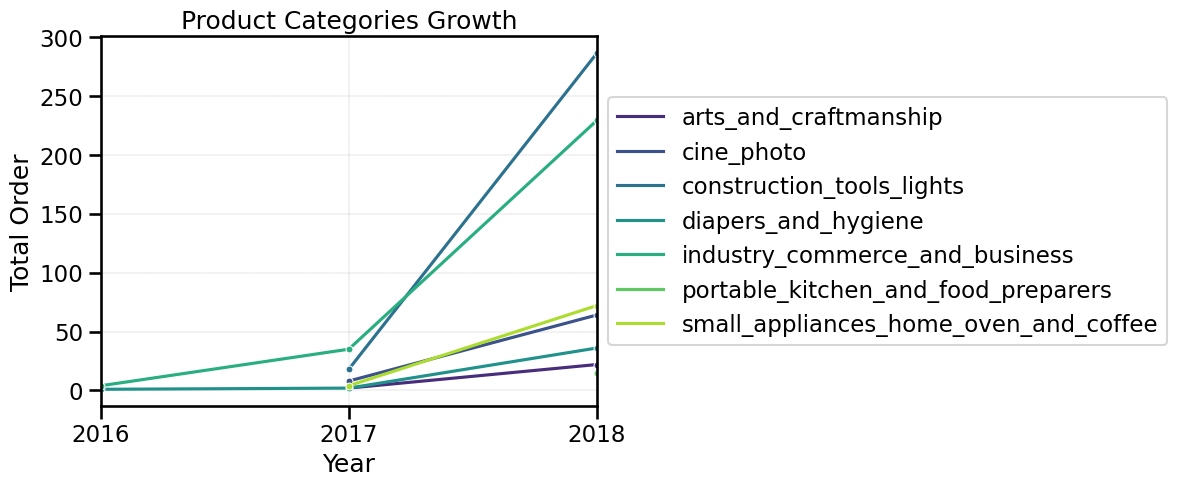

In [44]:
sns.set_context("talk")
ax = sns.lineplot(data = product_trend, y="order_id", x="order_purchase_year", hue = "product_category_name", marker =  ".", markersize = 10, palette = "viridis")
plt.xlabel("Year")
plt.ylabel("Total Order")
plt.xlim(2016, 2018)
plt.xticks(ticks = [2016, 2017, 2018])
plt.grid(visible = True, linestyle = '--', linewidth = 0.1, color = "black", zorder = 0)
plt.legend(loc = 'center left', bbox_to_anchor  = (1,0.5))
plt.markers = True

ax.set_title('Product Categories Growth')